In [1]:
import urllib.request
import itertools

#print(urllib.request.urlopen("https://www.stackoverflow.com").getcode())
'''try:
    print(urllib.request.urlopen("https://track-dhl-info.de/").getcode())
except OSError:
    print("DNS error")'''
    
#print(['-'.join(el) for el in itertools.permutations(['track', 'info', 'dhl'], 3)])

for el in itertools.permutations(['track', 'info', 'dhl'], 3):
    try:
        print(urllib.request.urlopen("https://" + '-'.join(el) + ".de/").getcode())
    except OSError:
        print("DNS error: " + '-'.join(el))
    try:
        print(urllib.request.urlopen("https://" + ''.join(el) + ".de/").getcode())
    except OSError:
        print("DNS error: " + ''.join(el))
        
for el in itertools.permutations(['info', 'dps'], 2):
    try:
        print(urllib.request.urlopen("https://" + '-'.join(el) + ".de/").getcode())
    except OSError:
        print("DNS error: " + '-'.join(el))
    try:
        print(urllib.request.urlopen("https://" + ''.join(el) + ".de/").getcode())
    except OSError:
        print("DNS error: " + ''.join(el))

DNS error: track-info-dhl
DNS error: trackinfodhl
DNS error: track-dhl-info
DNS error: trackdhlinfo
DNS error: info-track-dhl
DNS error: infotrackdhl
DNS error: info-dhl-track
DNS error: infodhltrack
DNS error: dhl-track-info
DNS error: dhltrackinfo
DNS error: dhl-info-track
DNS error: dhlinfotrack
DNS error: info-dps
DNS error: infodps
DNS error: dps-info
DNS error: dpsinfo


1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000


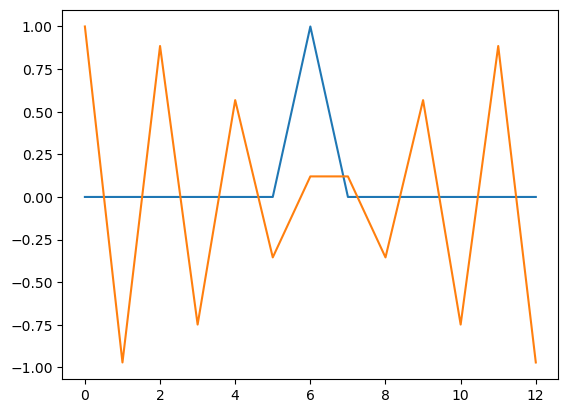

In [15]:
from numpy.fft import fft
from numpy import array
import matplotlib.pyplot as plt

a = array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,])
b = fft(a)
print( ' '.join("%5.3f" % abs(f) for f in b) )
plt.plot(a)
plt.plot(b)
plt.show()

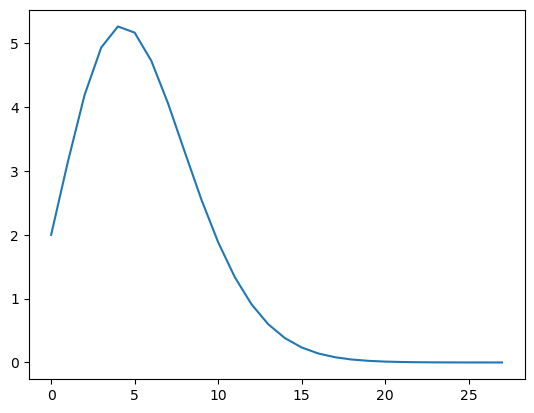

[2, 3.141592653589793, 4.1887902047863905, 4.934802200544679, 5.263789013914324, 5.167712780049969, 4.724765970331401, 4.058712126416768, 3.2985089027387064, 2.550164039877345, 1.8841038793898999, 1.335262768854589, 0.9106287547832829, 0.5992645293207919, 0.3814432808233043, 0.23533063035889312, 0.14098110691713897, 0.08214588661112819, 0.04662160103008852, 0.025806891390014047, 0.013949150409020995, 0.007370430945714347, 0.0038106563868521228, 0.0019295743094039218, 0.0009577224088231724, 0.00046630280576761223, 0.000222872124721274, 0.00010463810492484562]


In [47]:
# n-dim sphere
import math
import matplotlib.pyplot as plt

c1 = 2
c2 = math.pi
c = [c1, c2]
for i in range(4, 30, 2):
    c1 *= 2*math.pi/(i-1)
    c2 *= 2*math.pi/(i)
    c.append(c1)
    c.append(c2)
plt.plot(c)
plt.show()

print(c)

In [1]:
import math

def isprime(n):
    k = 2
    while k < int(math.sqrt(n) + 1):
        if n % k == 0:
            return False
        if k == 2:
            k += 1
        else:
            k += 2
    return True

print(sum([n for n in range(2, 44) if isprime(n)]))

281


In [2]:
import numpy as np
import scipy.optimize as opt

n0, K = 27, 7_800_000_000

def f(t, r):
    return (n0 * np.exp(r * t)) / (( 1 + n0 * (np.exp(r * t) - 1) / K))

y = [
27, 27, 27, 44, 44, 59, 59, 59, 59, 59, 59, 59, 59, 60, 60,
61, 61, 66, 83, 219, 239, 392, 534, 631, 897, 1350, 2023,
2820, 4587, 6067, 7823, 9826, 11946, 14554, 17372, 20615,
24522, 28273, 31491, 34933, 37552, 40540, 43105, 45177,
60328, 64543, 67103, 69265, 71332, 73327, 75191, 75723,
76719, 77804, 78812, 79339, 80132, 80995, 82101, 83365,
85203, 87024, 89068, 90664, 93077, 95316, 98172, 102133,
105824, 109695, 114232, 118610, 125497, 133852, 143227,
151367, 167418, 180096, 194836, 213150, 242364, 271106,
305117, 338133, 377918, 416845, 468049, 527767, 591704,
656866, 715353, 777796, 851308, 928436, 1000249, 1082054,
1174652,
]
x = np.linspace(0.0, 96, 97)

r, cov = opt.curve_fit(f, x, y, [0.5])

# Our answer for r given the world data and simplistic model
print("The r for the world Covid-19 data is:", r,
    ", with covariance of", cov)   
print("The calculated R0 is then", np.exp(12 * r))

The r for the world Covid-19 data is: [0.11230218] , with covariance of [[2.46164331e-08]]
The calculated R0 is then [3.8482793]


In [1]:
# Tensor product

# Sample 1
a1 = [[1, 2], [3, 4]]
b1 = [[0, 5], [6, 7]]

# Sample 2
a2 = [[0, 1, 0], [1, 1, 1], [0, 1, 0]]
b2 = [[1, 1, 1, 1], [1, 0, 0, 1], [1, 1, 1, 1]]

def kronecker(a, b):
    return [ [b[i % len(a)][j % len(a)] * a[i // len(a)][j // len(a)] for j in range(len(a) * len(b))] for i in range(len(a) * len(b))]

print(kronecker(a1, b1))
print(kronecker(a2, b2))

[[0, 5, 0, 10], [6, 7, 12, 14], [0, 15, 0, 20], [18, 21, 24, 28]]
[[0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 0, 0, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 1, 1, 0, 0, 0]]


In [1]:
# Wilsons
import math

def isprime(p):
    # p is prime if and only if p divides (p - 1)! + 1
    return (math.factorial(p - 1) + 1) % p == 0

print(isprime(21))

False


In [1]:
import random

random.randint(30000000, 31999999)

30678629

In [1]:
# p-adic numbers


class Padic:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
    def add(self, a):
        res = str(self.n)
        carry = 0
        for idx, el in enumerate(str(self.n)):
            res[idx] = (int(res[idx]) + int(a[idx]) + carry) % self.p
            carry = (int(res[idx]) + int(a[idx]) + carry) // self.p
        self.n = int(res)
        return int(res)
    
    def to_string(self):
        return str(self.n)
    
p0 = Padic(5, 2)

In [8]:
# Calculate the sequence where each term an is the smallest natural number greater than
# the previous term, that has exactly n divisors.
import math

def ndivisors(a):
    if a == 1: return 1
    if a <= 3: return 2
    return len([1 for k in range(3,int(math.sqrt(a))+3) if a % k == 0]) + 2

def seq(n):
    res = [1,2]
    k = 3
    while k < n:
        lastn = k
        while lastn < n:
            if ndivisors(lastn) == k:
                res.append((k, lastn))
                break
            lastn += 1
        k += 1
    return res

print(ndivisors(4))
print(seq(100))

3
[1, 2, (3, 4), (4, 12), (5, 24), (6, 48), (7, 72)]


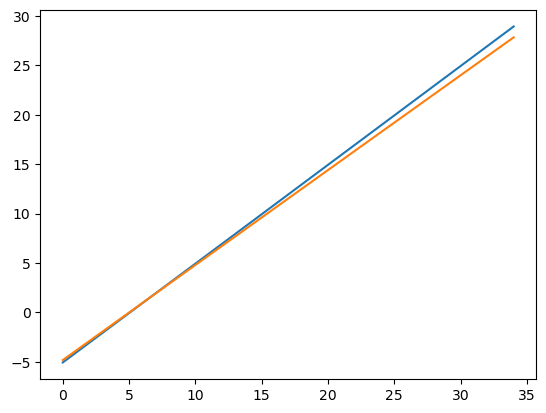

In [1]:
# TP
import math
import matplotlib.pyplot as plt

def tdp_approx(t, rh=0.7):
    return t - (1 - rh) / 5 - 5

def tdp(t, rh=0.7):
    b = 18.678
    c = 257.14
    gamma = math.log(rh) + b*t / (c+t)
    return c * gamma / (b - gamma)

#T = 12
#print(tdp_approx(T))
#print(tdp(T))

tmax = 35
plt.plot([tdp_approx(t) for t in range(tmax)])
plt.plot([tdp(t) for t in range(tmax)])

plt.show()

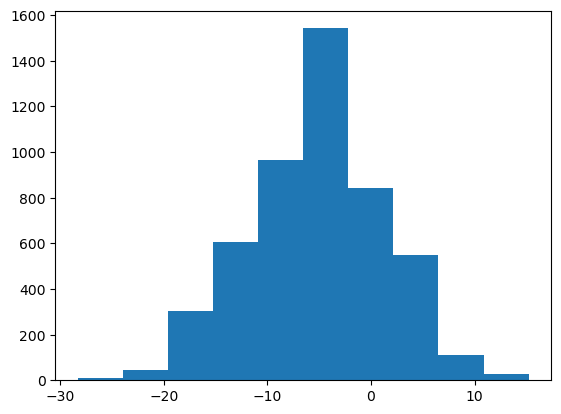

In [1]:
# head or tails
import math
import random
import matplotlib.pyplot as plt

def headortails(payh, payt):
    if random.random() > 0.5:
        return payh
    return payt

def playgame(nsteps, payh, payt, wealth = 1):
    for i in range(nsteps):
        wealth *= (1 + headortails(payh, payt))
    return wealth

#print(playgame(100, 0.8, -0.5))
x = [math.log(playgame(100, 0.8, -0.5)) for i in range(5000)]
plt.hist(x)
plt.show() 

In [1]:
# HyperLogLog++
import math
import random

# Intuition:  hash values with more leading zeros are less likely and indicate a larger cardinality
# Require: Let h : D → {0, 1} base 32 hash data from domain D
# Let m = 2**p with p ∈ [4..16]
# Phase 0: Initialization
p = range(4, 16)
m = [2**ip for ip in p]

# input stream of data elements S is divided into m substreams Si of roughly equal size
S = [[random.randint(1,10) for i in range(5)] for j in range(3)]

twopower32 = 2**32

def ro(x):
    '''number of leading zeros in binary representation of x'''
    return 34 - len(bin(x))  # 32 + 2 for the leading 0b for Python binary

def am(m):
    if m == 16: return 0.673
    if m == 32: return 0.697
    if m == 64: return 0.709
    if m >= 128:
        return 0.7213/(1 + 1.079/m)
    return -1  # error, should never happen

def linearcounting(m, V):
    '''Returns the LinearCounting cardinality estimate'''
    return m * math.log(m/V)

def hyperloglog(S):
    # Initialize m registers M[0] to M[m − 1] to 0
    M = [0 for i in range(m)]
    # Phase 1: Aggregation
    for v in S:
        x = h(v)
        #idx = x31, . . . , x32−p  # First p bits of x (first two chars in Python are 0b for binary)
        idx = int(str(bin(x))[2:p+2], 2)
        #w = x31−p, . . . , x0  # last p bits of x
        idx = int(str(bin(x))[p+2:], 2)
        M[idx] = max(M[idx], ro(w))

    # Phase 2: Result computation
    E = αm(m) * m**2 / sum([1/2**M[j] for j in range(m-1)])  # The “raw” estimate
    if E <= 5/2*m:
        # Let V be the number of registers equal to 0
        V = M.count(0)
        if V != 0:
            Estar = linearcounting(m, V)
        else:
            Estar = E
    elif E <= twopower32/30:
        Estar = E
    else:
        Estar = - twopower32 * math.log(1 - E/twopower32)
    return Estar

print(m, p)
print(S)

[16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768] range(4, 16)
[[9, 2, 10, 4, 6], [3, 3, 10, 2, 6], [2, 6, 5, 10, 8]]


In [2]:
# hash of two arrays

keys = ['a', 'b', 'c']
values = [1, 2, 3]
hashlist = dict(zip(keys, values))
print(hashlist)



{'a': 1, 'b': 2, 'c': 3}


In [ ]:
def rotl32(a, b):
    return (((a << (b & 0x1f)) & 0xffffffff) |
            ((a >> (32 - (b & 0x1f))) & 0xffffffff))

def fmix(h):
    h = h ^ (h >> 16)
    h = (h * 0x85ebca6b) & 0xffffffff
    h = h ^ (h >> 13)
    h = (h * 0xc2b2ae35) & 0xffffffff
    h = h ^ (h >> 16)
    return h

def mmhash(value, seed):
    import struct
    length = len(value)
    num_blocks = length / 4
    tail_length = length % 4
    fmt = "<" + ("i" * num_blocks) + ("b" * tail_length)
    vals = struct.unpack(fmt, value)

    h1 = seed
    c1 = 0xcc9e2d51
    c2 = 0x1b873593
    for block in vals[:num_blocks]:
        k1 = block
        k1 = (k1 * c1) & 0xffffffff
        k1 = rotl32(k1, 15)
        k1 = (k1 * c2) & 0xffffffff

        h1 = h1 ^ k1
        h1 = rotl32(h1, 13)
        h1 = (h1 * 5 + 0xe6546b64) & 0xffffffff

    k1 = 0
    if tail_length >= 3:
        k1 = k1 ^ ((vals[num_blocks + 2] << 16) & 0xffffffff)
    if tail_length >= 2:
        k1 = k1 ^ ((vals[num_blocks + 1] <<  8) & 0xffffffff)
    if tail_length >= 1:
        k1 = k1 ^ ( vals[num_blocks]            & 0xffffffff)
        k1 = (k1 * c1) & 0xffffffff
        k1 = rotl32(k1, 15)
        k1 = (k1 * c2) & 0xffffffff
        h1 = h1 ^ k1

    h1 = h1 ^ (length & 0xffffffff)
    return fmix(h1)


if __name__ == "__main__":
    import sys
    if len(sys.argv) != 2 and len(sys.argv) != 3:
        print("Usage: mmhash.py <string> [<seed>]")
        sys.exit(1)

    def myhex(v):
        return hex(v).rstrip("L")

    if len(sys.argv) == 3:
        seed = long(sys.argv[2]) & 0xffffffff
    else:
        seed = 0

    print(myhex(mmhash(sys.argv[1], seed)))

In [3]:
# https://github.com/juanplopes/hyperloglog.py/blob/master/hyperloglog.py
import mmh3
from math import log
from base64 import b64encode
import unittest
from random import randint

class HyperLogLog:
    def __init__(self, log2m):
        self.log2m = log2m
        self.m = 1 << log2m
        self.data = [0]*self.m
        self.alphaMM = (0.7213 / (1 + 1.079 / self.m)) * self.m * self.m

    def offer(self, o):
        x = mmh3.hash(str(o), 0)
        a, b = 32-self.log2m, self.log2m
        i = x >> a
        v = self._bitscan(x << b, a)
        self.data[i] = max(self.data[i], v)

    def count(self):
        estimate = self.alphaMM / sum([2**-v for v in self.data])
        if estimate <= 2.5 * self.m:
            zeros = float(self.data.count(0))
            return round(-self.m * log(zeros / self.m))
        else:
            return round(estimate)

    def _bitscan(self, x, m):
        v = 1
        while v<=m and not x&0x80000000:
            v+=1
            x<<=1
        return v
    
    


class TestHyperLogLog(unittest.TestCase):
    def test_mid_range_with_strings(self):
        self.execute(10000, 10, 0.05)

    def test_long_range_with_strings(self):
        self.execute(100000, 10, 0.05)

    def test_low_range_with_strings(self):
        self.execute(100, 10, 0.05)


    def execute(self, set_size, m, p):
        print ('t', set_size, m, p)

        hll = HyperLogLog(m)
        for i in range(set_size):
            hll.offer(str(i))

        estimate = hll.count()
        error = abs(estimate/float(set_size) - 1)
        
        strdata = hll.datastr()
        print ('e', estimate, error, 1<<m, len(strdata))
        self.assertLess(len(hll.datastr()), 1<<m)
        self.assertLess(error, p)
        
    
if __name__ == "__main__":
    unittest.main()


ModuleNotFoundError: No module named 'mmh3'

In [7]:
# vectorization performance enhancement
import math
import timeit
import numpy as np

def compound_returns(rets):
    return math.exp(sum([math.log(value + 1) for value in rets])) - 1

def compound_returns_np(rets):
    return np.expm1(np.log1p(rets).sum())

rets = [.2, .1, .1, 0, -.01]
#print(compound_returns(rets))
%timeit compound_returns(rets)  # 2.39 µs ± 52.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
nprets = np.array(rets)
%timeit compound_returns_np(nprets)  # 6.91 µs ± 193 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

1.34 µs ± 6.24 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
2.36 µs ± 7.34 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [5]:
# Turing machine and Busy Beaver

def turing_step(machine, state, cellvalue):
    return machine[state][cellvalue]

def tape_state(tape):
    for idx, el in enumerate(tape):
        if el[1] != '':
            if el[1] == 'H':
                return -1  # halt
            return idx

def run_turing(machine, tape):
    tape_idx = tape_state(tape)
    while tape_idx >= 0:
        print(tape)
        next_step = turing_step(machine, tape[tape_idx][1], tape[tape_idx][0])
        tape[tape_idx][0] = next_step[1]
        tape[tape_idx][1] = ''
        tape[tape_idx + next_step[2]][1] = next_step[0]
        tape_idx = tape_state(tape)
        if tape_idx < 0:
            return tape
    return tape

ex_0 = {'A': {0: ['B', 1, 1], 1: ['B', 1, -1]}, 'B': {0: ['A', 1, -1], 1: ['H', -1, 0]}}

print(turing_step(ex_0, 'A', 0))

ex_tape0 = [[0,''], [0,''], [0,''], [0,'A'], [0,''], [0,'']]

run_turing(ex_0, ex_tape0)

['B', 1, 1]
[[0, ''], [0, ''], [0, ''], [0, 'A'], [0, ''], [0, '']]
[[0, ''], [0, ''], [0, ''], [1, ''], [0, 'B'], [0, '']]
[[0, ''], [0, ''], [0, ''], [1, 'A'], [1, ''], [0, '']]
[[0, ''], [0, ''], [0, 'B'], [1, ''], [1, ''], [0, '']]
[[0, ''], [0, 'A'], [1, ''], [1, ''], [1, ''], [0, '']]
[[0, ''], [1, ''], [1, 'B'], [1, ''], [1, ''], [0, '']]


[[0, ''], [1, ''], [-1, 'H'], [1, ''], [1, ''], [0, '']]

In [6]:
# sum(propdivs(N)) = M and sum(propdivs(M)) = N
# 1184 and 1210 are an amicable pair, with proper divisors:
#  1, 2, 4, 8, 16, 32, 37, 74, 148, 296, 592   and
#  1, 2, 5, 10, 11, 22, 55, 110, 121, 242, 605   respectively

def divisors(n):
    res = [1]
    for k in range(2, n//2 + 1):
        if n % k == 0:
            res.append(k)
    return res

def isamicablepair(n, m):
    return sum(divisors(n)) == m and sum(divisors(m)) == n

print(isamicablepair(1184, 1210))

True


In [1]:
import requests

username = "user"
password = "pass"
url = "https://www.example.com"

response = requests.get(url, auth=(username, password))

print(response.text)

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This domai

In [2]:
from fractions import Fraction

for d in (0.9054054, 0.518518, 0.75): print(d, Fraction.from_float(d).limit_denominator(100))

0.9054054 67/74
0.518518 14/27
0.75 3/4


In [4]:
''' Python 3.6.5 code using Tkinter graphical user interface.''' 

from tkinter import *
import math

class Animation:
    def __init__(self, gw):
        self.window = gw
        self.xoff, self.yoff = 300, 100
        self.angle = 0
        self.sina = math.sin(self.angle)
        self.cosa = math.cos(self.angle)
        self.rodhyp = 170
        self.bobr = 30
        self.bobhyp = self.rodhyp + self.bobr
        self.rodx0, self.rody0 = self.xoff, self.yoff
        self.ra = self.rodx0
        self.rb = self.rody0
        self.rc = self.xoff + self.rodhyp*self.sina
        self.rd = self.yoff + self.rodhyp*self.cosa
        self.ba = self.xoff - self.bobr + self.bobhyp*self.sina
        self.bb = self.yoff - self.bobr + self.bobhyp*self.cosa
        self.bc = self.xoff + self.bobr + self.bobhyp*self.sina
        self.bd = self.yoff + self.bobr + self.bobhyp*self.cosa
        self.da = math.pi / 360

        # create / fill canvas:
        self.cnv = Canvas(gw, bg='lemon chiffon')
        self.cnv.pack(fill=BOTH, expand=True)

        self.cnv.create_line(0, 100, 600, 100,
                             fill='dodger blue',
                             width=3)
        radius = 8
        self.cnv.create_oval(300-radius, 100-radius,
                             300+radius, 100+radius,
                             fill='navy')    

        self.bob = self.cnv.create_oval(self.ba,
                                        self.bb,
                                        self.bc,
                                        self.bd,
                                        fill='red',
                                        width=2)

        self.rod = self.cnv.create_line(self.ra,
                                        self.rb,
                                        self.rc,
                                        self.rd,
                                        fill='dodger blue',
                                        width=6)

        self.animate()

    def animate(self):
        if abs(self.angle) > math.pi / 2:
            self.da = - self.da
        self.angle += self.da
        self.sina = math.sin(self.angle)
        self.cosa = math.cos(self.angle)
        self.ra = self.rodx0
        self.rb = self.rody0
        self.rc = self.xoff + self.rodhyp*self.sina
        self.rd = self.yoff + self.rodhyp*self.cosa
        self.ba = self.xoff - self.bobr + self.bobhyp*self.sina
        self.bb = self.yoff - self.bobr + self.bobhyp*self.cosa
        self.bc = self.xoff + self.bobr + self.bobhyp*self.sina
        self.bd = self.yoff + self.bobr + self.bobhyp*self.cosa
        
        self.cnv.coords(self.rod,
                        self.ra,
                        self.rb,
                        self.rc,
                        self.rd)
        self.cnv.coords(self.bob,
                        self.ba,
                        self.bb,
                        self.bc,
                        self.bd)
        self.window.update()
        self.cnv.after(5, self.animate)
         
root = Tk()
root.title('Pendulum')
root.geometry('600x400+100+50')
root.resizable(False, False)
a = Animation(root)
root.mainloop()

https://codeburst.io/pygam-getting-started-with-generalized-additive-models-in-python-457df5b4705f
    
pip install pygam

In [1]:
import pandas as pd        
from pygam import LogisticGAM
from sklearn.datasets import load_breast_cancer

#load the breast cancer data set
data = load_breast_cancer()
#keep first 6 features only
df = pd.DataFrame(data.data, columns=data.feature_names)[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
target_df = pd.Series(data.target)
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400


In [2]:
X = df[['mean radius', 'mean texture', 'mean perimeter', 'mean area','mean smoothness', 'mean compactness']]
y = target_df
#Fit a model with the default parameters
gam = LogisticGAM().fit(X, y)

In [3]:
gam.accuracy(X, y)

0.9560632688927944

In [4]:
XX = generate_X_grid(gam)
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(data.feature_names[0:6]))
titles = data.feature_names
for i, ax in enumerate(axs):
    pdep, confi = gam.partial_dependence(XX, feature=i+1, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[0][:, 0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    ax.set_title(titles[i])
plt.show()

NameError: name 'generate_X_grid' is not defined

In [5]:
lambda_ = 0.6
n_splines = [25, 6, 25, 25, 6, 4] 
constraints = None
gam = LogisticGAM(constraints=constraints, 
          lam=lambda_,
         n_splines=n_splines).fit(X, y)

In [6]:
gam = LogisticGAM().gridsearch(X, y)

InvalidIndexError: (slice(None, None, None), 0)

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gam = LogisticGAM().gridsearch(X_train, y_train)

InvalidIndexError: (slice(None, None, None), 0)

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))

Accuracy: 0.9574468085106383 
Log Loss: 0.09710343806804624 


In [9]:
lambda_ = [0.6, 0.6, 0.6, 0.6, 0.6, 0.6]
n_splines = [4, 14, 4, 6, 12, 12] 
constraints = [None, None, None, None, None, None]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
gam = LogisticGAM(constraints=constraints, 
                  lam=lambda_,
                 n_splines=n_splines).train(X_train, y_train)
predictions = gam.predict(X_test)
print("Accuracy: {} ".format(accuracy_score(y_test, predictions)))
probas = gam.predict_proba(X_test)      
print("Log Loss: {} ".format(log_loss(y_test, probas)))

AttributeError: 'LogisticGAM' object has no attribute 'train'

In [10]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
target_df = pd.Series(boston.target)
df.head()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [11]:
X = df
y = target_df
gam = LinearGAM(n_splines=10).gridsearch(X, y)
gam.summary()

NameError: name 'LinearGAM' is not defined

In [12]:
XX = generate_X_grid(gam)
plt.rcParams['figure.figsize'] = (28, 8)
fig, axs = plt.subplots(1, len(boston.feature_names[0:6]))
titles = boston.feature_names
for i, ax in enumerate(axs):
    pdep, confi = gam.partial_dependence(XX, feature=i+1, width=.95)
    ax.plot(XX[:, i], pdep)
    ax.plot(XX[:, i], confi[0][:, 0], c='grey', ls='--')
    ax.plot(XX[:, i], confi[0][:, 1], c='grey', ls='--')
    ax.set_title(titles[i],fontsize=26)
plt.show()

NameError: name 'generate_X_grid' is not defined

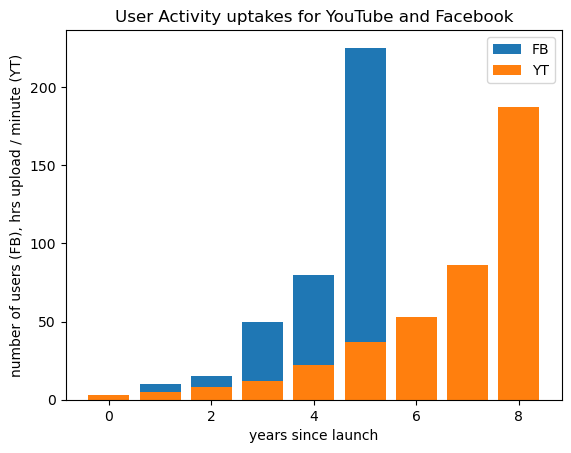

In [10]:
import math
import random
import matplotlib.pyplot as plt

yt = [3, 5,  8,  12, 22, 37, 53, 86, 187]
fb = [1, 10, 15, 50, 80, 225]
plt.bar(list(range(len(fb))), fb, label="FB")
plt.bar(list(range(len(yt))), yt, label="YT")

plt.xlabel("years since launch")
plt.ylabel("number of users (FB), hrs upload / minute (YT)")
plt.title("User Activity uptakes for YouTube and Facebook")
plt.legend()

plt.show() 

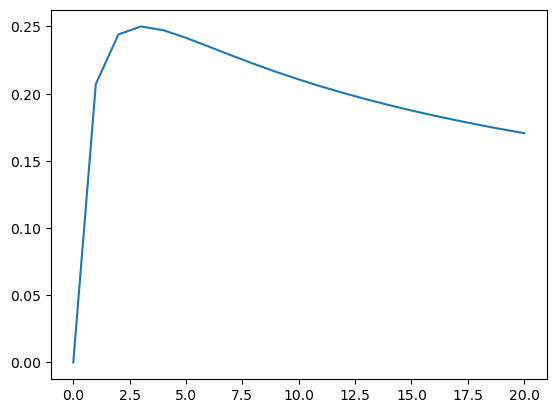

In [1]:
import math
import matplotlib.pyplot as plt

plt.plot([(math.sqrt(n)-1)/n for n in range(1,22)])
plt.show()

In [6]:
# evo algo
from string import ascii_letters
from random import choice, random
 
target  = list("METHINKS IT IS LIKE A WEASEL")
charset = ascii_letters + ' '
parent  = [choice(charset) for _ in range(len(target))]
minmutaterate  = .09
C = range(100)
 
perfectfitness = float(len(target))
    
def fitness(trial):
    'Sum of matching chars by position'
    return sum(t==h for t,h in zip(trial, target))
 
def mutaterate():
    'Less mutation the closer the fit of the parent'
    return 1-((perfectfitness - fitness(parent)) / perfectfitness * (1 - minmutaterate))
 
def mutate(parent, rate):
    return [(ch if random() <= rate else choice(charset)) for ch in parent]
 
def que():
    '(from the favourite saying of Manuel in Fawlty Towers)'
    print ("#%-4i, fitness: %4.1f%%, '%s'" %
           (iterations, fitness(parent)*100./perfectfitness, ''.join(parent)))

def mate(a, b):
    place = 0
    if choice(range(10)) < 7:
        place = choice(range(len(target)))
    else:
        return a, b
    
    return a, b, a[:place] + b[place:], b[:place] + a[place:]

iterations = 0
center = int(len(C)/2)
while parent != target:
    rate = mutaterate()
    iterations += 1
    if iterations % 100 == 0: que()
    copies = [ mutate(parent, rate) for _ in C ]  + [parent]
    parent1 = max(copies[:center], key=fitness)
    parent2 = max(copies[center:], key=fitness)
    parent = max(mate(parent1, parent2), key=fitness)
que()

#100 , fitness: 50.0%, 'MjTHIbaS xnswSSLJSFKWHWEASEL'
#200 , fitness: 53.6%, 'METHIaCSacTEtS LoKGfxgWEAdrL'
#300 , fitness: 60.7%, 'METHIapSUHT XSnLbKETAQWEAdgL'
#400 , fitness: 75.0%, 'LETHIwES In mS LIKe A WEAWEL'
#500 , fitness: 85.7%, 'VETMINKSmIT IS LIKl A WEASEL'
#600 , fitness: 96.4%, 'METHINNS IT IS LIKE A WEASEL'
#632 , fitness: 100.0%, 'METHINKS IT IS LIKE A WEASEL'


In [1]:
# sum digits

def sumdigits(n):
    return sum([int(i) for i in str(n)])

def primefactors(n):
    return [p for p in range(2, int(n/2 + 1)) if n % p == 0]

def smithnumbers(n=1000):
    res = []
    for i in range(1,n):
        if sumdigits(i) == sum([sumdigits(k) for k in primefactors(i)]):
            res.append(i)
    return res

print(smithnumbers())

[22, 58, 85, 94, 166, 202, 265, 274, 319, 346, 355, 361, 382, 391, 454, 517, 526, 535, 562, 634, 706, 778, 895, 913, 922, 958, 985]


In [1]:
n = 10
[(x,y,z) for x in range(1,n+1) for y in range(x,n+1) for z in range(y,n+1) if x**2 + y**2 == z**2]

[(3, 4, 5), (6, 8, 10)]

In [4]:

def to_tree(x, index=0, depth=1):
    so_far = []
    while index < len(x):
        this = x[index]
        if this == depth:
            so_far.append(this)
        elif this > depth:
            index, deeper = to_tree(x, index, depth + 1)
            so_far.append(deeper)
        else: # this < depth:
            index -=1
            break
        index += 1
    return (index, so_far) if depth > 1 else so_far

if __name__ ==  "__main__":
    from pprint import pformat

    def pnest(nest:list, width: int=9) -> str:
        text = pformat(nest, width=width).replace('\n', '\n    ')
        print(f" OR {text}\n")

    exercises = [
        [],
        [1, 2, 4],
        [3, 1, 3, 1],
        [1, 2, 3, 1],
        [3, 2, 1, 3],
        [3, 3, 3, 1, 1, 3, 3, 3],
        ]
    for flat in exercises:
        nest = to_tree(flat)
        print(f"{flat} NESTS TO: {nest}")
        pnest(nest)

[] NESTS TO: []
 OR []

[1, 2, 4] NESTS TO: [1, [2, [[4]]]]
 OR [1,
     [2,
      [[4]]]]

[3, 1, 3, 1] NESTS TO: [[[3]], 1, [[3]], 1]
 OR [[[3]],
     1,
     [[3]],
     1]

[1, 2, 3, 1] NESTS TO: [1, [2, [3]], 1]
 OR [1,
     [2,
      [3]],
     1]

[3, 2, 1, 3] NESTS TO: [[[3], 2], 1, [[3]]]
 OR [[[3],
      2],
     1,
     [[3]]]

[3, 3, 3, 1, 1, 3, 3, 3] NESTS TO: [[[3, 3, 3]], 1, 1, [[3, 3, 3]]]
 OR [[[3,
       3,
       3]],
     1,
     1,
     [[3,
       3,
       3]]]



In [3]:
from itertools import product

while True:
    bexp = input('\nBoolean expression: ')
    bexp = bexp.strip()
    if not bexp:
        print("\nThank you")
        break
    code = compile(bexp, '<string>', 'eval')
    names = code.co_names
    print('\n' + ' '.join(names), ':', bexp)
    for values in product(range(2), repeat=len(names)):
        env = dict(zip(names, values))
        print(' '.join(str(v) for v in values), ':', eval(code, env))


Boolean expression: A ^ B

A B : A ^ B
0 0 : 0
0 1 : 1
1 0 : 1
1 1 : 0


KeyboardInterrupt: Interrupted by user

In [9]:
# modes

def modes(l):
    l.sort()
    maxcount = 0
    maxidx = 0
    i = 0
    while i < len(l):
        elcount = l.count(l[i])
        if elcount > maxcount:
            maxcount = elcount
            maxidx = i
        i += elcount
        if len(l) - maxcount <= 0:
            return l[maxidx]
    return l[maxidx], maxcount


print(modes([1, 3, 6, 6, 6, 6, 7, 7, 12, 12, 17]))
print(modes([1, 3, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 12, 12, 17, 4]))

(6, 4)
(7, 7)


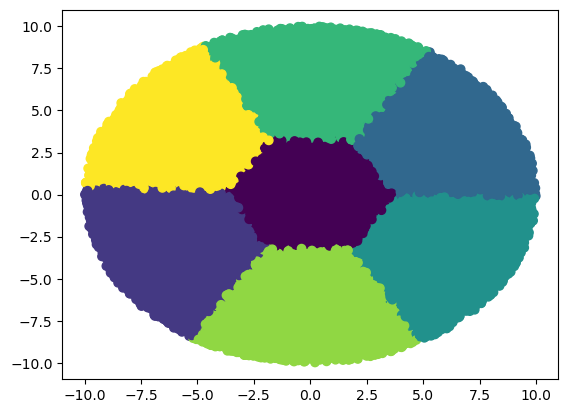

In [11]:
# K-means ++

from math import pi, sin, cos
from collections import namedtuple
from random import random, choice
from copy import copy

import matplotlib.pyplot as plt

try:
    import psyco
    psyco.full()
except ImportError:
    pass

FLOAT_MAX = 1e100

class Point:
    __slots__ = ["x", "y", "group"]
    def __init__(self, x=0.0, y=0.0, group=0):
        self.x, self.y, self.group = x, y, group

def generate_points(npoints, radius):
    points = [Point() for _ in range(npoints)]

    # note: this is not a uniform 2-d distribution
    for p in points:
        r = random() * radius
        ang = random() * 2 * pi
        p.x = r * cos(ang)
        p.y = r * sin(ang)

    return points

def nearest_cluster_center(point, cluster_centers):
    """Distance and index of the closest cluster center"""
    def sqr_distance_2D(a, b):
        return (a.x - b.x) ** 2  +  (a.y - b.y) ** 2
    min_index = point.group
    min_dist = FLOAT_MAX

    for i, cc in enumerate(cluster_centers):
        d = sqr_distance_2D(cc, point)
        if min_dist > d:
            min_dist = d
            min_index = i

    return (min_index, min_dist)

def kpp(points, cluster_centers):
    cluster_centers[0] = copy(choice(points))
    d = [0.0 for _ in range(len(points))]

    for i in range(1, len(cluster_centers)):
        sum = 0
        for j, p in enumerate(points):
            d[j] = nearest_cluster_center(p, cluster_centers[:i])[1]
            sum += d[j]

        sum *= random()

        for j, di in enumerate(d):
            sum -= di
            if sum > 0:
                continue
            cluster_centers[i] = copy(points[j])
            break

    for p in points:
        p.group = nearest_cluster_center(p, cluster_centers)[0]


def lloyd(points, nclusters):
    cluster_centers = [Point() for _ in range(nclusters)]
    # call k++ init
    kpp(points, cluster_centers)
    lenpts10 = len(points) >> 10

    changed = 0
    while True:
        # group element for centroids are used as counters
        for cc in cluster_centers:
            cc.x = 0
            cc.y = 0
            cc.group = 0

        for p in points:
            cluster_centers[p.group].group += 1
            cluster_centers[p.group].x += p.x
            cluster_centers[p.group].y += p.y

        for cc in cluster_centers:
            cc.x /= cc.group
            cc.y /= cc.group

        # find closest centroid of each PointPtr
        changed = 0
        for p in points:
            min_i = nearest_cluster_center(p, cluster_centers)[0]
            if min_i != p.group:
                changed += 1
                p.group = min_i

        # stop when 99.9% of points are good
        if changed <= lenpts10:
            break

    for i, cc in enumerate(cluster_centers):
        cc.group = i

    return cluster_centers


def print_eps(points, cluster_centers, W=400, H=400):
    Color = namedtuple("Color", "r g b");
    colors = []
    for i in range(len(cluster_centers)):
        colors.append(Color((3 * (i + 1) % 11) / 11.0,
                            (7 * i % 11) / 11.0,
                            (9 * i % 11) / 11.0))

    max_x = max_y = -FLOAT_MAX
    min_x = min_y = FLOAT_MAX

    for p in points:
        if max_x < p.x: max_x = p.x
        if min_x > p.x: min_x = p.x
        if max_y < p.y: max_y = p.y
        if min_y > p.y: min_y = p.y

    scale = min(W / (max_x - min_x),
                H / (max_y - min_y))
    cx = (max_x + min_x) / 2
    cy = (max_y + min_y) / 2

    print("%%!PS-Adobe-3.0\n%%%%BoundingBox: -5 -5 %d %d" % (W + 10, H + 10))

    print("/l {rlineto} def /m {rmoveto} def\n" +
           "/c { .25 sub exch .25 sub exch .5 0 360 arc fill } def\n" +
           "/s { moveto -2 0 m 2 2 l 2 -2 l -2 -2 l closepath " +
           "   gsave 1 setgray fill grestore gsave 3 setlinewidth" +
           " 1 setgray stroke grestore 0 setgray stroke }def")

    for i, cc in enumerate(cluster_centers):
        print("%g %g %g setrgbcolor" %
               (colors[i].r, colors[i].g, colors[i].b))
        for p in points:
            if p.group != i:
                continue
            print("%.3f %.3f c" % ((p.x - cx) * scale + W / 2,
                                    (p.y - cy) * scale + H / 2))
        print("\n0 setgray %g %g s" % ((cc.x - cx) * scale + W / 2,
                                        (cc.y - cy) * scale + H / 2))
    print("\n%%%%EOF")

def main():
    npoints = 30000
    k = 7 # # clusters
    points = generate_points(npoints, 10)
    cluster_centers = lloyd(points, k)
    #print_eps(points, cluster_centers)
    x = [p.x for p in points]
    y = [p.y for p in points]
    c = [p.group for p in points]
    plt.scatter(x, y, c = c)
    #plt.scatter(cluster_centers)
    plt.show()

main()

In [3]:
# round robin

def roundrobin(players):
    return [(p0, p1) for p0 in players for p1 in players if p0 < p1]

roundrobin([1, 2, 3, 4])

[(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]

In [6]:
from collections import deque

l = [1, 2, 3]
queue = deque(l)

print(l.pop())
print(l)
print(queue.popleft())

3
[1, 2]
1


In [4]:
# Church numerals

def churchn(n, f, x):
    cv = [x]
    for i in range(n):
        cv.append(f(cv[-1]))
    return cv

print(churchn(6, lambda f: f*f, 2))

[2, 4, 16, 256, 65536, 4294967296, 18446744073709551616]


In [10]:
# Combinations with repetitions
from itertools import combinations_with_replacement

tastes, k = 'iced jam plain'.split(), 2
#print(list(combinations_with_replacement(tastes, k)))
    
def combrep(n, k, pos=0, start = 0, l = []):
    if pos == k:
        print(l)
    else:
        for i in range(start, len(n)):
            combrep(n, k, pos+1, i, l + [i+1])
            
def combinations_with_replacement(n, r):  # itertools implementation
    pool = tuple(range(n))
    if not n and r:
        return
    indices = [0] * r
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != n - 1:
                break
        else:
            return
        indices[i:] = [indices[i] + 1] * (r - i)
        yield tuple(pool[i] for i in indices)

for i in combinations_with_replacement(3, 3):
    print(i)

#CombinationRepetition(tastes, 3, k)
#print(combrep(tastes, k))

(0, 0, 0)
(0, 0, 1)
(0, 0, 2)
(0, 1, 1)
(0, 1, 2)
(0, 2, 2)
(1, 1, 1)
(1, 1, 2)
(1, 2, 2)
(2, 2, 2)


In [72]:
# 1/primes
#from fractions import Fraction
from decimal import Decimal

def primes(n):
    res = [2]
    for p in range(2, n):
        k = 2
        while p % k > 0 and k < (int(p/2) + 1):
            k += 1
        if p % k > 0:
            res.append(p)
    return res

def oneoverprime(primes):
    getcontext().prec = 120
    #return [(p, Fraction(1, p)) for p in primes]
    return [(p, Decimal(1) / Decimal(p)) for p in primes]

def findrepeat(p, oop):
    #stroop = str(oop)
    stroop = '0.' + ('0' * (-oop.as_tuple().exponent - len(oop.as_tuple().digits))) + ''.join(([str(d) for d in oop.as_tuple().digits]))
    #print(stroop)
    sidx = 2
    idx1 = 3
    while sidx < p+1 and idx1 < p+1:
        substr = stroop[2:sidx+1]
        idx1 = stroop[sidx+1:].find(substr)
        #print(substr, stroop[2:sidx+1].find(substr), stroop[3:].find(substr))
        if idx1 > 0:
            sidx += 1
        else:
            return sidx - 1
    return 0

#print(f'{oneoverprime(primes(30))}')
#print(findrepeat(29, Decimal('0.0344827586206896551724137931034482758620689655172413793103448275862068965517241379310344827586206896551724137931034482759')))
print([(p[0], findrepeat(p[0], Decimal(str(p[1])))) for p in oneoverprime(primes(30))])

[(2, 0), (3, 1), (5, 1), (7, 6), (11, 2), (13, 6), (17, 16), (19, 18), (23, 22), (29, 28)]


In [146]:

def primes(n):
    res = [2]
    for p in range(2, n):
        k = 2
        while p % k > 0 and k < (int(p/2) + 1):
            k += 1
        if p % k > 0:
            res.append(p)
    return res

def longdivideby(number):
    dividend = 1
    while dividend:
        #print("ld: ", dividend, dividend // number)
        yield dividend // number
        dividend = (dividend % number) * 10
        
def longdivstr(number, digits=100):
    i = 0
    res = []
    for digit in longdivideby(number):
        res.append(str(digit))
        i+=1
        if i == digits:
            return "".join(res)
    return "".join(res)
        
def oneoverprime(primes):
    return [(p, longdivstr(p, 2*p+1)) for p in primes]

def findrepeat(p, oop):
    #stroop = str(oop)
    stroop = '0.' + ('0' * (-oop.as_tuple().exponent - len(oop.as_tuple().digits))) + ''.join(([str(d) for d in oop.as_tuple().digits]))
    #print(stroop)
    sidx = 2
    idx1 = 3
    while sidx < p+1 and idx1 < p+1:
        substr = stroop[2:sidx+1]
        idx1 = stroop[sidx+1:].find(substr)
        #print(substr, stroop[2:sidx+1].find(substr), stroop[3:].find(substr))
        if idx1 > 0:
            sidx += 1
        else:
            return sidx - 1
    return 0

#print(oneoverprime(primes(30)))
print([(p[0], findrepeat(p[0], Decimal(str(p[1])))) for p in oneoverprime(primes(1000))])

[(2, 0), (3, 1), (5, 1), (7, 6), (11, 2), (13, 6), (17, 16), (19, 18), (23, 22), (29, 28), (31, 15), (37, 3), (41, 5), (43, 21), (47, 46), (53, 13), (59, 58), (61, 60), (67, 33), (71, 35), (73, 8), (79, 13), (83, 41), (89, 1), (97, 96), (101, 1), (103, 34), (107, 53), (109, 108), (113, 1), (127, 42), (131, 130), (137, 8), (139, 46), (149, 148), (151, 1), (157, 78), (163, 81), (167, 166), (173, 43), (179, 1), (181, 1), (191, 95), (193, 192), (197, 98), (199, 99), (211, 30), (223, 1), (227, 1), (229, 228), (233, 232), (239, 7), (241, 30), (251, 50), (257, 256), (263, 262), (269, 268), (271, 5), (277, 69), (281, 28), (283, 141), (293, 146), (307, 153), (311, 155), (313, 312), (317, 79), (331, 110), (337, 336), (347, 173), (349, 116), (353, 32), (359, 179), (367, 366), (373, 186), (379, 378), (383, 382), (389, 388), (397, 99), (401, 200), (409, 204), (419, 418), (421, 140), (431, 215), (433, 432), (439, 1), (443, 1), (449, 1), (457, 152), (461, 460), (463, 154), (467, 233), (479, 239), (48

please enter function:x**5 - x**4 - 12*x**3 + 2*x**2 - 10*x + 1


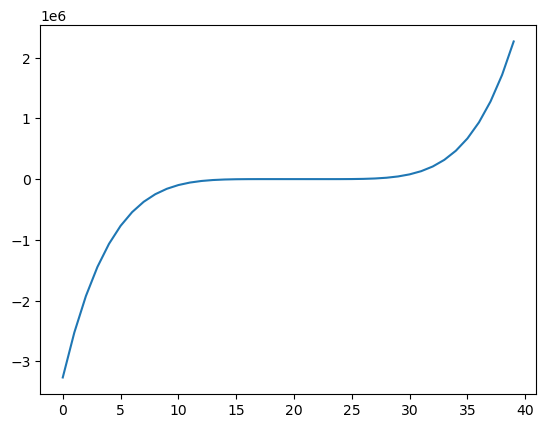

In [97]:
import matplotlib.pyplot as plt

def poly(x, pf):
    #return x**5 - x**4 - 12*x**3 + 2*x**2 - 10*x + 1
    return eval(pf)

polyf = input('please enter function:')

plt.plot([poly(x, polyf) for x in range(-20, 20)])
plt.show()

In [147]:
import math

def agm(a0, g0, tolerance = 1e-10):
    an = (a0 + g0) / 2.0
    gn = math.sqrt(a0 * g0)
    if abs(an - gn) > tolerance:
        (an, gn) = ((an + gn) / 2.0, math.sqrt(an * gn))
    return an
   
print(agm(1, 1 / math.sqrt(2)))



0.8472249029234942


In [4]:
def first(function):
    return function()

def second():
    return "second"

first(lambda: "second")

'second'

In [8]:
# Tetration

def knuthexp(n, k):
    if k <= 1:
        return n
    return n * knuthtet(n, k-1)

def knuthtet(n, k):
    if k <= 1:
        return n
    return n ** knuthtet(n, k-1)

knuthtet(2, 4)

65536

In [11]:
# modular multiplicative inverse a*x = 1 + k*m

def mul_inv(a, b):
    b0 = b
    x0 = 0
    x1 = 1
    if b == 1:
        return 1
    while a > 1:
        q = a // b
        (a, b) = (b, a % b)
        (x0, x1) = (x1 - q * x0, x0)
    if x1 < 0:
        x1 += b0
    return x1

print(mul_inv(42, 2017))

1969


In [12]:
import numpy as np

x = [0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]
y = [1,   6,  17,  34,  57,  86, 121, 162, 209, 262, 321]
coeffs = np.polyfit(x, y, deg=2)
coeffs


array([3., 2., 1.])

In [15]:

def limit(f):
    x = 0
    res0 = eval(f)
    x = 1000
    return (res0, eval(f))

print(limit('x**2 / (2+x**3)'))

(0.0, 0.000999999998)


In [64]:

def hanoi(n, s, t, towers):
    if n == 1:  # base case
        towers[t].append(towers[s].pop())
        return towers
    mp = [0,1,2]
    mp.remove(s)
    mp.remove(t)
    return hanoi(n-1, mp[0], t, hanoi(1, s, t, hanoi(n-1, s, mp[0], towers)))

#hanoi(2, 0, 2, [[2,1], [], []])
#hanoi(3, 0, 2, [[3,2,1], [], []])
hanoi(4, 0, 2, [[4,3,2,1], [], []])

[[], [], [4, 3, 2, 1]]

In [65]:
sum([n for n in range(1,31)])

465

In [3]:
import math

n = int(math.sqrt(269696)) - 1
while not str(n*n)[-6:] == '269696':
    n += 1
print(n)

25264


In [1]:
original = 'Mary had a %s lamb.'
extra = 'little'
original % extra

'Mary had a little lamb.'

In [1]:
import time
import random

def choice(l, d=0):
    '''choose an appropriate start for the pivot for quicksort'''
    return l[min(max(len(l)//2 + d, 0), len(l)-1)]

def quickSort(a):
    if len(a) <= 1:
        return a
    else:
        less = []
        more = []
        pivot = choice(a)
        for i in a:
            if i < pivot:
                less.append(i)
            if i > pivot:
                more.append(i)
        less = quickSort(less)
        more = quickSort(more)
        return less + [pivot] * a.count(pivot) + more

def quickSortD(a, d=0):
    if len(a) <= 1:
        return a
    else:
        less = []
        more = []
        pivot = choice(a, d)
        for i in a:
            if i < pivot:
                less.append(i)
            if i > pivot:
                more.append(i)
        if len(less) > len(more):
            distr = -len(less)//2
        else:
            distr = len(less)//2
        less = quickSortD(less, distr)
        more = quickSortD(more, distr)
        return less + [pivot] * a.count(pivot) + more
    
a = [4, 65, 2, -31, 0, 99, 83, 782, 1]
#a = quickSortD(a)
#print(a)

#a = [random.randrange(-100, 100) for i in range(10000)]
a = [int(random.triangular(-100, 100, -50)) for i in range(10000)]
start_time = time.perf_counter()
for i in range(50):
    b = quickSort(a)
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")
start_time = time.perf_counter()
for i in range(50):
    b = quickSortD(a)
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}")   

The execution time is: 0.3404381000000285
The execution time is: 0.38921990000017104


In [1]:
import PyPDF2
import os
import re

MY_PATH = r'C:\Users\bscho\Desktop\Orladeyo Mailing Jun23'
os.chdir(MY_PATH)

pdffileobject = open('EAACI 2022 - APeX-2 150 mg poster_final_6.15.22(1).pdf', 'rb')
pdfreader = PyPDF2.PdfFileReader(pdffileobject)
pageobj = pdfreader.getPage(0)
fulltext = pageobj.extractText()

refpattern = r'Reference'
#print(re.match(refpattern, fulltext, re.IGNORECASE))
fulltext.find(refpattern)

6248

In [6]:
# permutations

def getperms(chars, indent=0):
    if len(chars) == 1:
        return [chars]
    permutations = []
    head = chars[0]
    tail = chars[1:]
    tailperms = getperms(tail, indent + 1)  # get all tailpermutations
    for tailperm in tailperms:
        for i in range(len(tailperm)+1):
            newperm = tailperm[0:i] + head + tailperm[i:]  # compile and append all tail-permutations
            permutations.append(newperm)
    return permutations

getperms('ABCD')

['ABCD',
 'BACD',
 'BCAD',
 'BCDA',
 'ACBD',
 'CABD',
 'CBAD',
 'CBDA',
 'ACDB',
 'CADB',
 'CDAB',
 'CDBA',
 'ABDC',
 'BADC',
 'BDAC',
 'BDCA',
 'ADBC',
 'DABC',
 'DBAC',
 'DBCA',
 'ADCB',
 'DACB',
 'DCAB',
 'DCBA']

In [16]:
# Fibonacci memoized
import functools
import time


fibcache = {}

def fibmem(nthnumber, indent=0):
    global fibcache
    indentation = '.' * indent
    if nthnumber in fibcache:
        return fibcache[nthnumber]
    if nthnumber == 1 or nthnumber == 2:
        fibcache[nthnumber] = 1
        return 1
    else:
        result = fibmem(nthnumber-1, indent+1)
        result += fibmem(nthnumber-2, indent+1)
        fibcache[nthnumber] = result
        return result

@functools.lru_cache()
def fibmemft(nthnumber):
    if nthnumber == 1 or nthnumber == 2:
        return 1
    else:
        result = fibmem(nthnumber-1)
        result += fibmem(nthnumber-2)
        return result
    
#print(fibmem(10), fibmemft(10))

start_time = time.perf_counter()
for i in range(1000):
    b = fibmem(16)
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}") 

start_time = time.perf_counter()
for i in range(1000):
    b = fibmemft(16)
end_time = time.perf_counter()
execution_time = end_time - start_time
print(f"The execution time is: {execution_time}") 

The execution time is: 0.0002505999873392284
The execution time is: 0.00013539998326450586
